# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Формат файла WAV - это формат для хранения данных оцифрованных аудиосигналов.

Структра файла представляет собой две, четко делящиеся, области. Одна из них — заголовок файла, другая — область данных. В заголовке файла хранится информация о:
* Размере файла.
* Количестве каналов.
* Частоте дискретизации.
* Количестве бит в сэмпле (эту величину ещё называют глубиной звучания).

Собственно, последние 2 пункта определяют параметры дискретизации и квантования. 

Узнать их можно, например, с помощью библиотеки **Wave**: https://docs.python.org/3/library/wave.html#wave.Wave_read.getsampwidth

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [2]:
import IPython
from IPython.display import Audio
from scipy.io import wavfile

In [3]:
sample_rate, data = wavfile.read("..\\ПриветMADE.wav")

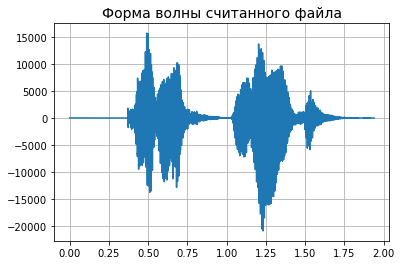

In [4]:
length = data.shape[0] / sample_rate

time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0])
plt.title("Форма волны считанного файла", fontsize=14)
plt.grid()

Попробуйте поменять ему частоту дискретизации. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

In [5]:
for coef_decay in range(1, 17, 3):
    print(f"Коэффициент понижения частоты дискретизации: {coef_decay}")
    IPython.display.display(Audio(data[::coef_decay, 0], rate=sample_rate//coef_decay))

Коэффициент понижения частоты дискретизации: 1


Коэффициент понижения частоты дискретизации: 4


Коэффициент понижения частоты дискретизации: 7


Коэффициент понижения частоты дискретизации: 10


Коэффициент понижения частоты дискретизации: 13


Коэффициент понижения частоты дискретизации: 16


При понижении частоты дискретизации в 13 раз сигнал уже не очень отчетливо слышно, но при этом разобрать можно. При понижении в 16 раз уже почему-то ничего не слышно.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Формат **wav** используется для записи звука без сжатия (выше уровень квантования), а **mp3** (или **ogg**) - для записи звука со сжатием. При этом последнии занимают меньше места на жестком диске.

Ссылки: 
* https://thedifference.ru/chem-otlichaetsya-mp3-ot-wav/
* https://www.audiomania.ru/content/art-7314.html

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [6]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 8)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [7]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

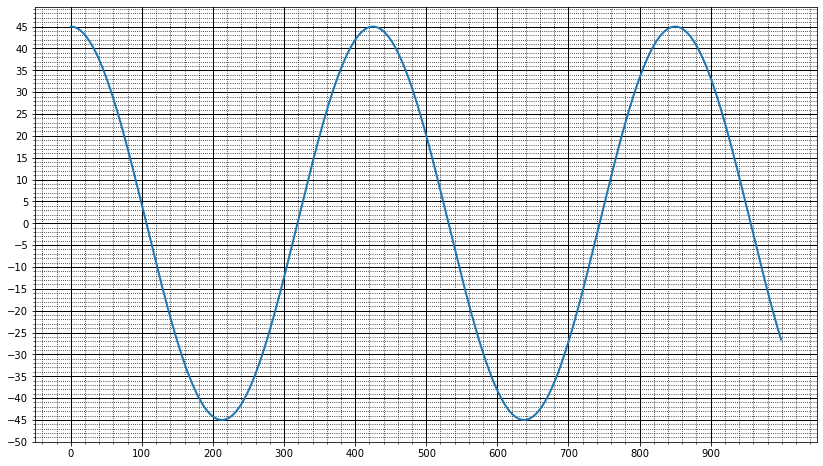

In [8]:
draw_signal(test_data['task2']['a'])

In [9]:
# YOUR CODE HERE

A = 45
w = 2 * np.pi / 425
fi = np.pi / 2

x = np.arange(1000)

# сигнал
a = A * np.sin(w * x + fi)

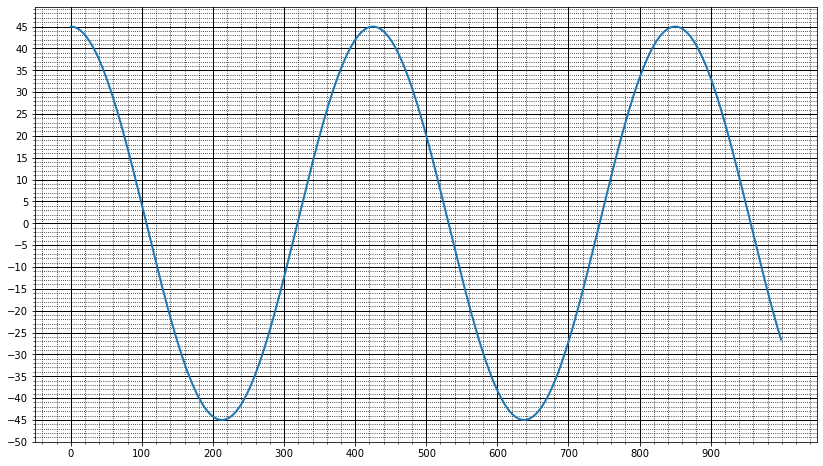

In [10]:
draw_signal(a)

In [11]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425}$

3. Фаза - $\phi= \frac{\pi}{2}$

### Сигнал ***b***

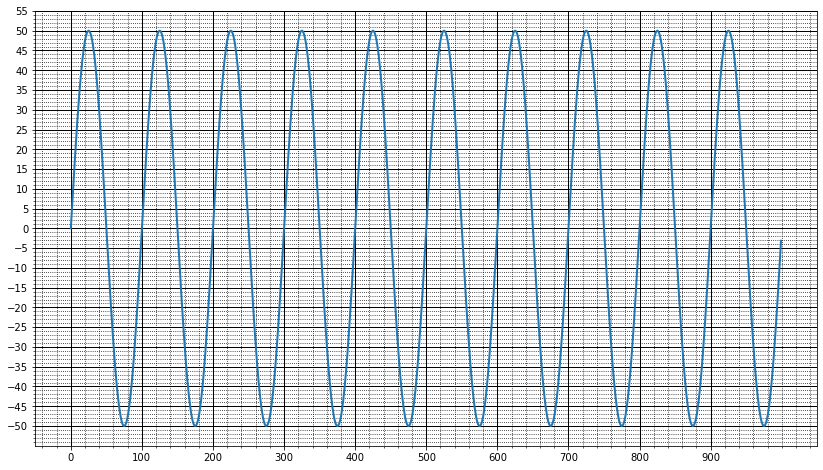

In [12]:
draw_signal(test_data['task2']['b'])

In [13]:
# YOUR CODE HERE

A = 50
w = 2 * np.pi / 100
fi = 0

x = np.arange(1000)

# сигнал
b = A * np.sin(w * x + fi)

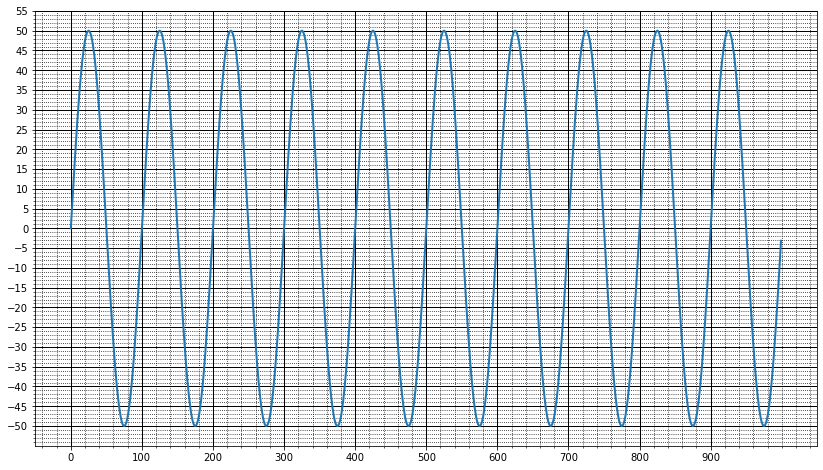

In [14]:
draw_signal(b)

In [15]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100}$

3. Фаза - $\phi= 0$

### Сигнал ***c***

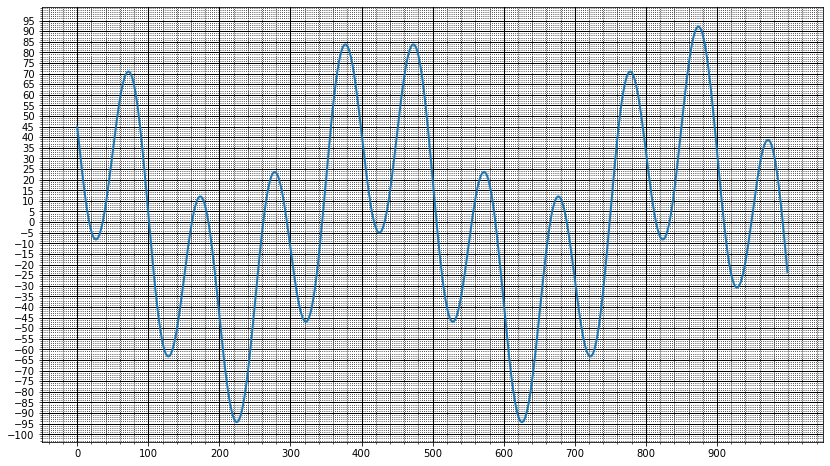

In [16]:
draw_signal(test_data['task2']['c'])

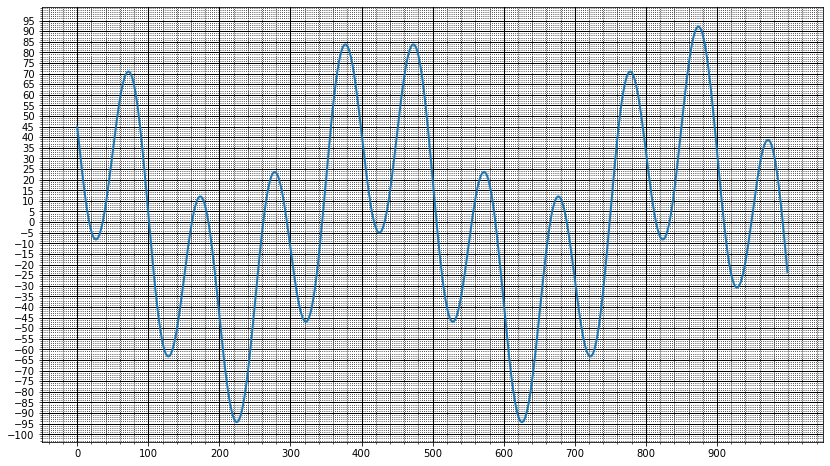

In [17]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE

# сигнал
c = a - b

draw_signal(c)

In [18]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [19]:
import scipy
from scipy import signal

In [20]:
def convolve(in1, in2):
    
    shift = in1.size + in2.size - 1
    window = np.hstack((in1, np.zeros(shift)))

    in2_new = np.hstack((np.zeros(in1.size), in2, np.zeros(in1.size - 1)))

    conv = np.zeros(shift, dtype=int)

    for i in range(shift):
        window = np.roll(window, 1)
        conv[i] = np.sum(window * in2_new)

    return conv

In [21]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [22]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [23]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

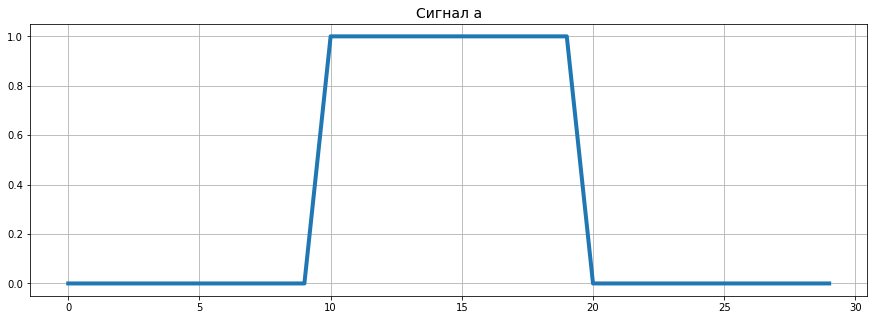

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(a, linewidth=4)
plt.title("Сигнал a", fontsize=14)
plt.grid("--")

Сигнал **b**

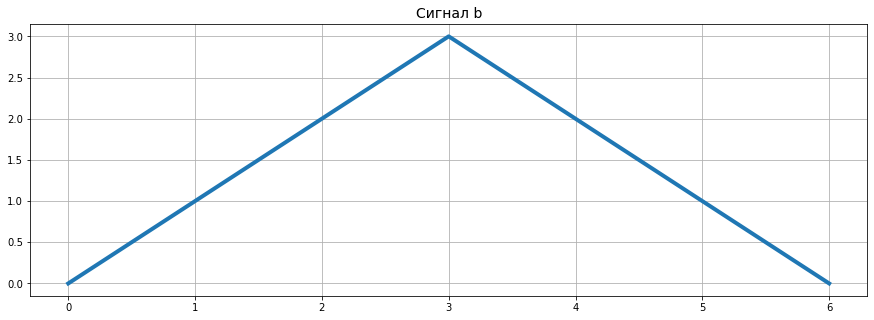

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(b, linewidth=4)
plt.title("Сигнал b", fontsize=14)
plt.grid("--")

Свертка **a** и **b**

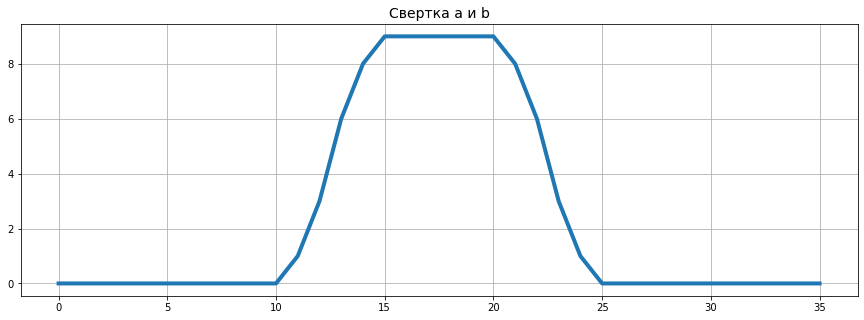

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(convolve(a, b), linewidth=4)
plt.title("Свертка a и b", fontsize=14)
plt.grid("--")

Все 3 графика на одной картинке:

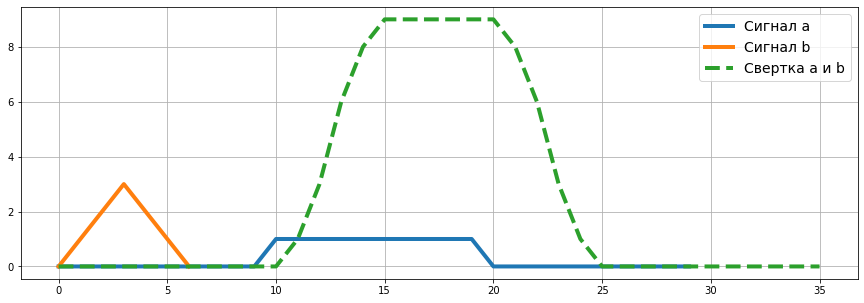

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(a, linewidth=4, label="Сигнал a")
plt.plot(b, linewidth=4, label="Сигнал b")
plt.plot(convolve(a, b), linewidth=4, linestyle="--", label="Свертка a и b")
plt.grid("--")
plt.legend(fontsize=14);

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [28]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

    y = np.zeros(N)
    
    delay = noise.size
    
    y[:delay] = noise
    
    for i in range(delay, y.size):
        if i == delay:
            y[i] = y[i - delay] / 2
        else:
            y[i] = (y[i - delay] + y[i - delay - 1]) / 2
    
    return y

In [29]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


In [30]:
import IPython
from IPython.display import Audio

In [31]:
Audio(gen_wav, rate=sample_rate)

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [32]:
guitar_note_freq = [329.63, 246.94, 196.00, 146.83, 110.00, 82.41]
guitar_note_names = ["e", "B", "G", "D", "A", "E"]  # из Википедии 

np.random.seed(seed=1)

sample_rate = 44100
sec = 2
gen_len = sample_rate * sec

notes = []

for freq in guitar_note_freq:
 
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate/freq)))
    gen_wav = karplus_strong(noise, gen_len)
    
    notes.append(gen_wav)

In [33]:
for note, name in zip(notes, guitar_note_names):
    print(f"Нота {name}")
    IPython.display.display(Audio(note, rate=sample_rate))

Нота e


Нота B


Нота G


Нота D


Нота A


Нота E


Визуализируем затухание амплитуды:

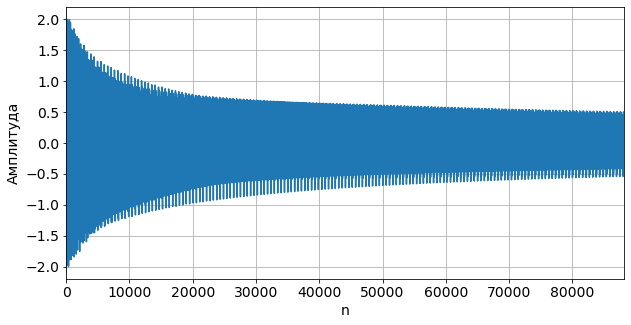

In [34]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

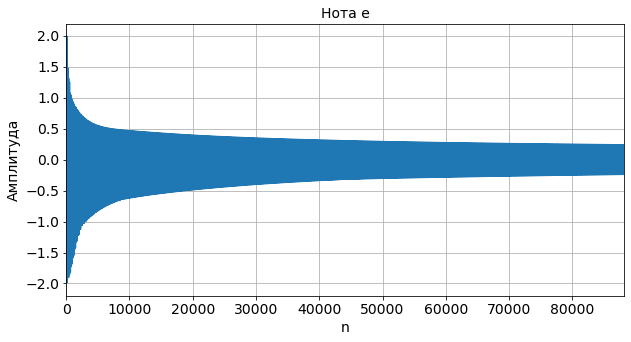

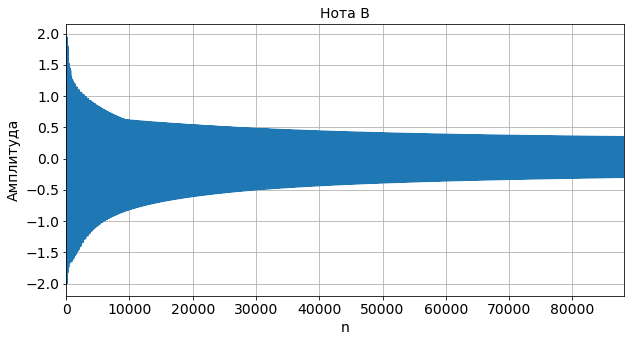

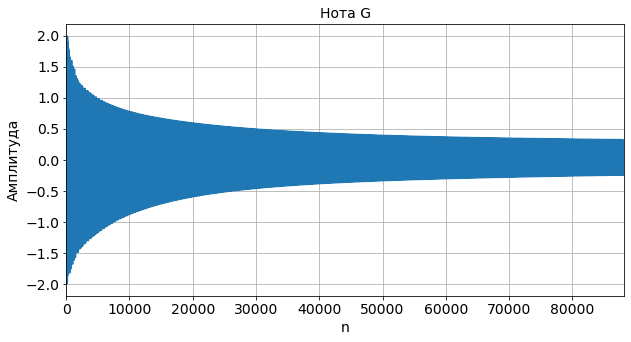

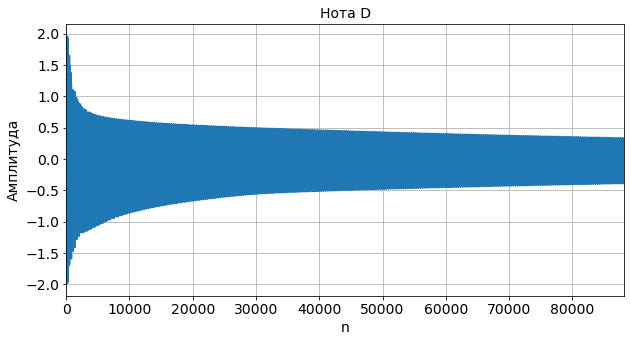

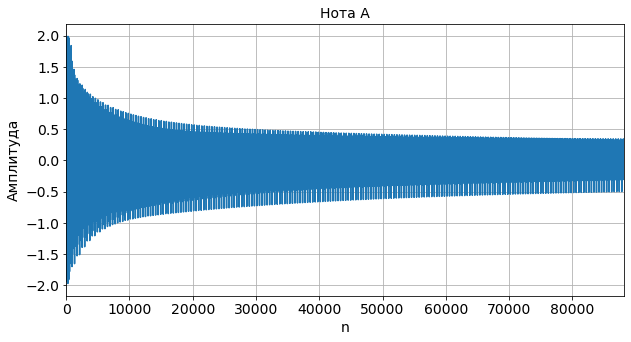

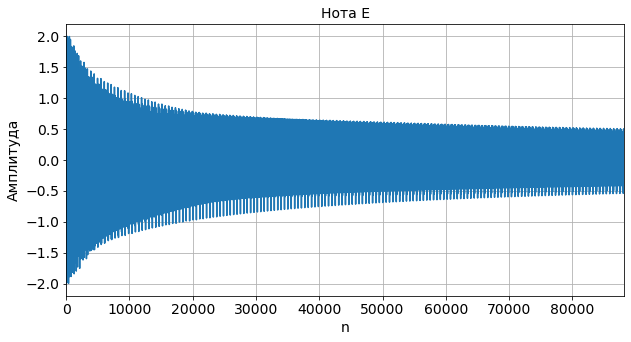

In [35]:
for note, name in zip(notes, guitar_note_names):
    
    plt.figure(figsize=(10,5))
    plt.xlabel('n', fontsize=14)
    plt.ylabel('Амплитуда', fontsize=14)
    plt.xlim(0, gen_len)
    plt.plot(np.linspace(0, gen_len+1, gen_len), note)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.title(f"Нота {name}", fontsize=14)
    plt.grid()